# Twitch Gamers Social Network Analysis
This dataset represents a social network of Twitch users-gamers collected via the public Twitch API in Spring 2018. Each node corresponds to an individual user, and edges denote mutual follower relationships between user pairs. The resulting graph constitutes a single connected component.

The dataset can be found in the [stanford datasets](https://snap.stanford.edu/data/twitch_gamers.html). We decided to focus on the portuguese speakers dataset.

In [1]:
from utils import *

G = nx.read_edgelist("data/musae_PTBR_edges.csv", delimiter=",", nodetype=int, comments="f")
G, df = load_twitch_user_attributes(G)

We also know some extra attributes of the users:

- days: The age of the user’s account, measured in days since creation at the time the data was collected.
- mature: A boolean flag indicating whether the user’s channel is marked as containing mature or adult-oriented content.
- views: The total number of views the user’s Twitch channel has received.
- partner: Indicates whether the user is a Twitch Partner, a verified status given to established streamers with significant viewership 

Now we can visualize the graph to get a better understanding:

In [ ]:
visualize_static_entire_graph(G, node_size= 25)

Now we can do an interactive visualization that also shows the attributes for each node. Also we keep the nodes of k_core 3 to showcase the more important nodes:

In [ ]:
generic_show(G, node_color='blue', node_size=20, node_tooltip=["id", "days", "views", "partner", "mature"], k_core=3)


Next, the graph summary statistics:

In [3]:
summary_stats(G)

Number of nodes: 1912
Number of edges: 31299
Average degree: 32.74
Density: 0.0171
Graph is connected.
Radius: 4
Diameter: 7
Average shortest path length: 2.53
Avg clustering: 0.3198952746693515


#### Insights
The Portuguese Twitch dataset shows a graph that is fairly large but also very well connected. Even though there are almost two thousand users, the network is fully connected, meaning everyone is reachable through others (no isolated component) which makes sense since gamers usually play and watch multiple games. On average, each user is connected to about 33 others, which helps explain why the average distance between any two people is only about 2-3 hops. The diameter of 7 and radius of 4 also suggest that no one is ever too far from anyone else. Even though the overall density is low, as is normal for social networks, the clustering coefficient is pretty high, meaning friends of a user are often friends with each other (holding the triadic closure). Overall, it looks like a close-knit community where information and interactions can spread quite fast.


### Attribute exploration
Next we can explore the attributes associated with each node to find some interesting insights:

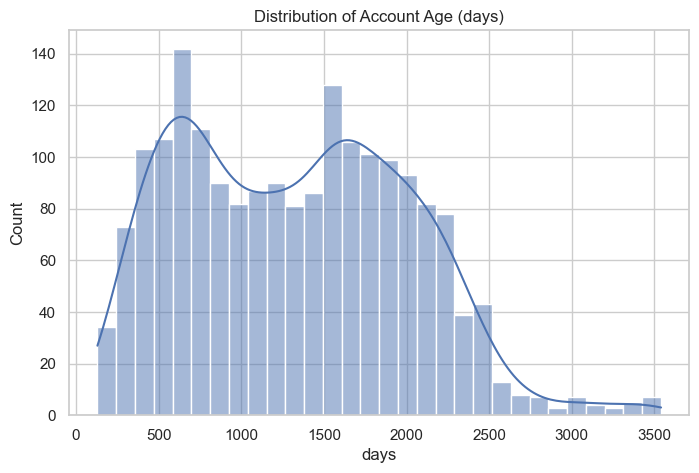

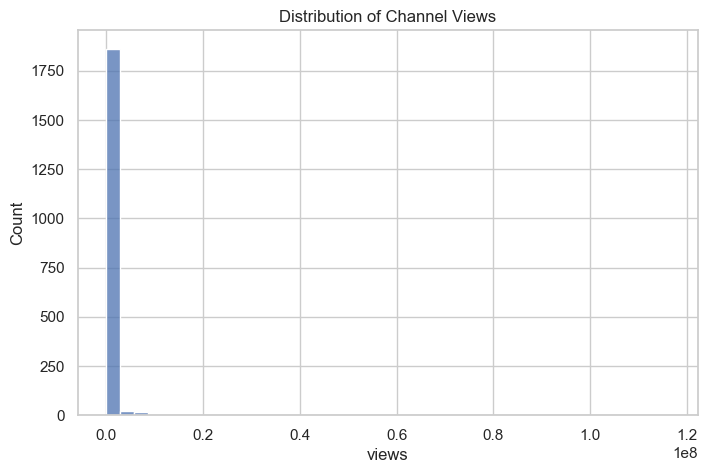

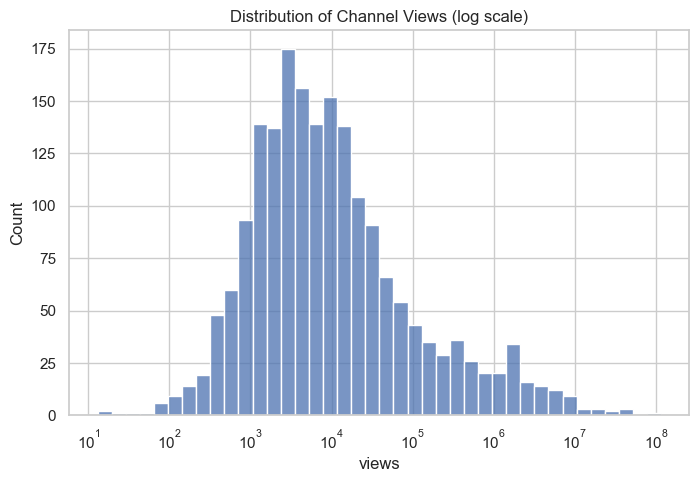

In [ ]:
twitch_user_exploratory_analysis(df)

### Centralities Analysis

In [ ]:
# Get degrees as (node, degree) pairs
degrees = G.degree()

# Sort by degree descending
top_nodes = sorted(degrees, key=lambda x: x[1], reverse=True)

# Print the top 10 nodes by degree
print("Top 10 nodes by degree:")
for node, deg in top_nodes[:10]:
    print(f"Node {node} — degree {deg}")

### Community Detection